In [ ]:
import os
import cv2
import random
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
(x_train,y_train),(x_test,y_test)= mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
images=[]
labels=[]
X_train=[]
Y_train=[]
X_test=[]
Y_test=[]

In [ ]:
image_size=(28,28)

In [ ]:
# load numpy array from npy file
from numpy import load
# load array
loaded_image_data = load('/content/drive/My Drive/Data_soduku/Final_Data/Processed_images20.npy')
loaded_label_data = load('/content/drive/My Drive/Data_soduku/Final_Data/Processed_labels20.npy')
# print the array
print(loaded_image_data.shape)
print(loaded_label_data.shape)

(140693, 28, 28)
(140693,)


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(loaded_image_data, loaded_label_data, test_size=0.15)

In [ ]:
X_train=np.array(X_train)

In [ ]:
X_train.shape

(119589, 28, 28)

In [ ]:
Y_test=np.array(Y_test)

In [ ]:
Y_train=np.array(Y_train)

In [ ]:
Y_train=np.array(Y_train)

In [ ]:
Y_train.shape

(119589,)

In [ ]:
combined = list(zip(X_train, Y_train))

random.shuffle(combined)

X_train, Y_train = zip(*combined)

In [ ]:
combined = list(zip(X_test, Y_test))

random.shuffle(combined)

X_test, Y_test = zip(*combined)

In [ ]:
X_train=np.array(X_train)

In [ ]:
Y_train=np.array(Y_train)

In [ ]:
X_test=np.array(X_test)

In [ ]:
Y_test=np.array(Y_test)

In [ ]:
(X_train).shape

(119589, 28, 28)

In [ ]:
X_train[900].max()

255

In [ ]:
X_train=X_train/255

In [ ]:
X_train = X_train.reshape(119589,28,28,1)

In [ ]:
(X_test).shape

(21104, 28, 28)

In [ ]:
X_test=X_test/255

In [ ]:
X_test.shape

(21104, 28, 28)

In [ ]:
X_test = X_test.reshape(21104,28,28,1)

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
Y_cat_train = to_categorical(Y_train,num_classes=10)
Y_cat_test = to_categorical(Y_test,num_classes=10)

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28,28,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)              

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [ ]:
model.fit(X_train,Y_cat_train,epochs=1000,validation_data=(X_test,Y_cat_test),callbacks=[early_stop])

Epoch 1/1000
3738/3738 [==============================] - 16s 4ms/step - loss: 2.2726 - accuracy: 0.1833 - val_loss: 2.2127 - val_accuracy: 0.4146
Epoch 2/1000
3738/3738 [==============================] - 16s 4ms/step - loss: 2.1662 - accuracy: 0.3124 - val_loss: 2.0665 - val_accuracy: 0.5638
Epoch 3/1000
3738/3738 [==============================] - 16s 4ms/step - loss: 2.0188 - accuracy: 0.3937 - val_loss: 1.8761 - val_accuracy: 0.6212
Epoch 4/1000
3738/3738 [==============================] - 16s 4ms/step - loss: 1.8391 - accuracy: 0.4630 - val_loss: 1.6567 - val_accuracy: 0.6785
Epoch 5/1000
3738/3738 [==============================] - 16s 4ms/step - loss: 1.6487 - accuracy: 0.5238 - val_loss: 1.4368 - val_accuracy: 0.7253
Epoch 6/1000
3738/3738 [==============================] - 16s 4ms/step - loss: 1.4720 - accuracy: 0.5738 - val_loss: 1.2444 - val_accuracy: 0.7589
Epoch 7/1000
3738/3738 [==============================] - 16s 4ms/step - loss: 1.3161 - accuracy: 0.6177 - val_loss: 1

In [ ]:
model=load_model('/content/drive/My Drive/Data_soduku/Digit_Model_34.h5')

In [ ]:
metrics = pd.DataFrame(model.history.history)

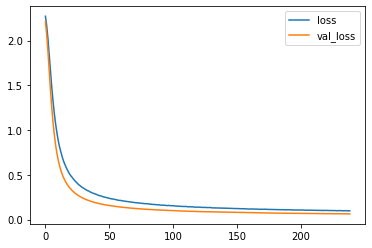

In [ ]:
metrics[['loss','val_loss']].plot()

In [ ]:
model.save("/content/drive/My Drive/Data_soduku/Digit_Model_P21.h5")

In [ ]:
import matplotlib.pyplot as plt

Test images shape: (4, 28, 28)
Predicted digit: 7
Predicted digit: 4
Predicted digit: 7
Predicted digit: 4


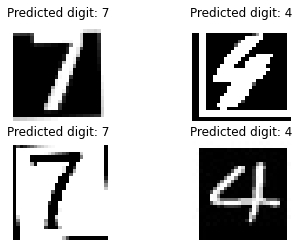

In [ ]:
test_images = X_test[170:174]
test_images = test_images.reshape(test_images.shape[0], 28, 28)
print ("Test images shape: {}".format(test_images.shape))
for i, test_image in enumerate(test_images, start=1):
    org_image = test_image
    test_image = test_image.reshape(1,28,28,1)
    prediction = model.predict_classes(test_image, verbose=0)
    print ("Predicted digit: {}".format(prediction[0]))
    plt.subplot(220+i)
    plt.axis('off')
    plt.title("Predicted digit: {}".format(prediction[0]))
    plt.imshow(org_image, cmap=plt.get_cmap('gray'))
plt.show()

In [ ]:
import os
import cv2
import numpy as np
from tensorflow.keras.models import load_model

In [ ]:
new_model=load_model('/content/drive/My Drive/Data_soduku/Digit_Model_P21.h5')

In [ ]:
images_dir='/content/drive/My Drive/Data_soduku/Digits1/'

In [ ]:
images=os.listdir(images_dir)

In [ ]:
predict_grid= np.zeros((9,9))

for image in images:
    imagec=image.split(".")[0][5:7]
    (x,y)=(int(imagec[0]),int(imagec[1]))
    my_image=cv2.imread(images_dir+image,0)
    #print(images_dir+image)
    my_image=cv2.resize(my_image,(28,28))
    my_image=np.array(my_image)
    my_image=my_image
    my_image=my_image/255
    my_image = np.expand_dims(my_image, axis=0)
    my_image = np.expand_dims(my_image, axis=0)
    my_image=my_image.reshape(1,28,28,1)
    predict_grid[x][y] = new_model.predict_classes(my_image, verbose=0)[0]
    
    #org_img=cv2.imread(images_dir+image,1)

print(predict_grid)

[[0. 0. 5. 0. 5. 7. 5. 0. 7.]
 [3. 0. 0. 0. 5. 0. 0. 7. 9.]
 [5. 0. 0. 0. 6. 5. 0. 0. 0.]
 [0. 5. 0. 0. 0. 5. 0. 6. 8.]
 [0. 6. 0. 3. 4. 0. 6. 0. 0.]
 [4. 0. 2. 0. 0. 0. 0. 0. 0.]
 [0. 3. 4. 0. 0. 0. 1. 0. 0.]
 [8. 0. 0. 9. 0. 0. 0. 9. 1.]
 [0. 1. 1. 2. 1. 1. 2. 2. 9.]]
